# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [13]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats 

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
#clean_hospital_read_df = clean_hospital_read_df.dropna()
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\nkeen\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
clean_hospital_read_df.sort_values('Excess Readmission Ratio', ascending=False)


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013
5,WESTERN MISSOURI MEDICAL CENTER,260097,MO,READM-30-HIP-KNEE-HRRP,141,NaN,1.5189,8.1,5.3,19.0,07/01/2010,06/30/2013
6,SAINT AGNES HOSPITAL,210011,MD,READM-30-HIP-KNEE-HRRP,390,NaN,1.5079,7.8,5.2,38.0,07/01/2010,06/30/2013
7,MERCY HOSPITAL JEFFERSON,260023,MO,READM-30-HIP-KNEE-HRRP,178,NaN,1.5019,9.2,6.1,24.0,07/01/2010,06/30/2013
8,ONSLOW MEMORIAL HOSPITAL,340042,NC,READM-30-HIP-KNEE-HRRP,98,NaN,1.4953,7.9,5.3,15.0,07/01/2010,06/30/2013
9,FAUQUIER HOSPITAL,490023,VA,READM-30-HIP-KNEE-HRRP,256,NaN,1.4844,7.4,5.0,26.0,07/01/2010,06/30/2013


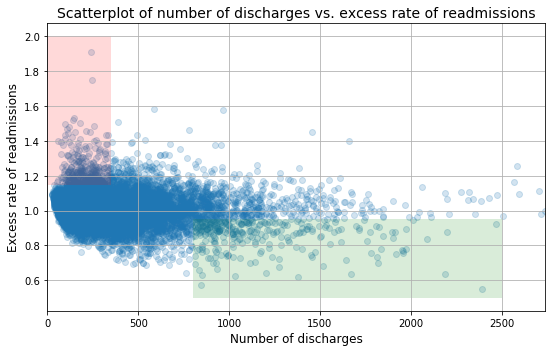

In [15]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

A.  Do you agree with the above analysis and recommendations?
    I <b>do not</b> agree with the conclusions of the analysis for the following reasons:
1.  A linear regression line is not included in the graph.
1.  The x axis is restricted to 2500 readmissions, which give the visual impression that readmittance continues to decrease as the number of discharges increases.  If the x axis is expanded to the end of the dataset it appears that the correlaton appears to turn upwards.
1.  The calculation for the "predicted" number of readmissions is not disclosed.  It is not totally based on historical readmission rates in the three year test period available in the data.  It is unclear whether or not the ratio of "predicted" versus "expected" is even a meaningful statistic.
1.  Areas with higher population have more hospitals.  It's possible that patients are not returning to the same hospital when they have a recurring instance of the tracked illnesses.  Whereas in a smaller community with fewer hospitals, patients have fewer options and are likely to return to the same hospital.
1.  Areas with fewer hospitals are likely in rural/poor areas.  Rural/poor populations may have higher incidences of the illnesses assessed in this study.
1.  The conclusion of the study is that hospital consolidation should be encouraged and incentivized.  This could have significant impacts on the health of those served by smaller hosiptals in rural and sparsly populated areas.

B.  Provide support for your arguments.
1.  Set an appropriate hypothesis test.
    $H_0$: The slope of the linear regression line for the relationship between Number of Discharges and Excess Rate of Readmissions for large hospitals is negative.
    $H_{alt}$: The slope of the linear regression line for large hospitals is not negative.

[1.71076336e-04 6.04107352e-01]


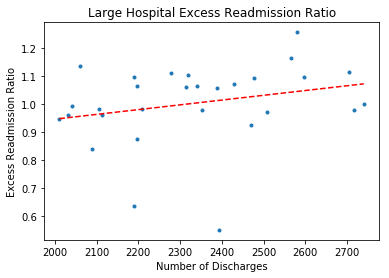

[-5.21487991e-05  1.04505307e+00]


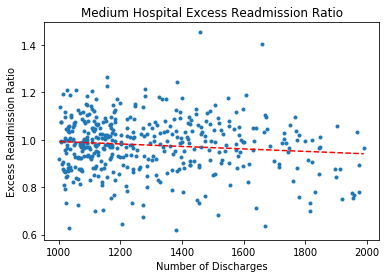

[-3.09734872e-05  1.01872536e+00]


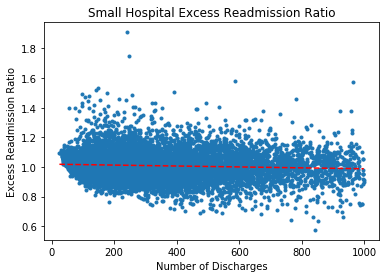

In [15]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
#Remove NA values and filter rows by size of hosiptal
keycols = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].dropna()
keycols_lh = keycols[(keycols['Number of Discharges']>2000)]
keycols_lh = keycols_lh[(keycols_lh['Number of Discharges']<3000)]
keycols_sh = keycols[(keycols['Number of Discharges']<1000)]
keycols_mh = keycols[(keycols['Number of Discharges']>1000)]
keycols_mh = keycols_mh[(keycols_mh['Number of Discharges']<2000)]

#large hospital trend
x_lh = list(keycols_lh['Number of Discharges'])
y_lh = list(keycols_lh['Excess Readmission Ratio'])
slope_lh, intercept_lh, r_value_lh, p_value_lh, std_err_lh = stats.linregress(x_lh,y_lh)
z_lh = np.polyfit(x_lh,y_lh,1)
print(z_lh)
trendline = np.poly1d(z_lh)

_ = plt.plot(x_lh,y_lh,marker = ".", linestyle='none')
_ = plt.plot(x_lh,trendline(x_lh), "r--", label = z_lh[0])
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')
_ = plt.title('Large Hospital Excess Readmission Ratio')
plt.show()

#Medium hospital Trend
x_mh = list(keycols_mh['Number of Discharges'])
y_mh = list(keycols_mh['Excess Readmission Ratio'])
slope_mh, intercept_mh, r_value_mh, p_value_mh, std_err_mh = stats.linregress(x_mh,y_mh)
z_mh = np.polyfit(x_mh,y_mh,1)
print(z_mh)
trendline = np.poly1d(z_mh)

_ = plt.plot(x_mh,y_mh,marker = ".", linestyle='none')
_ = plt.plot(x_mh,trendline(x_mh), "r--", label = z_mh[0])
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')
_ = plt.title('Medium Hospital Excess Readmission Ratio')
plt.show()

#Small hospital Trend
x_sh = list(keycols_sh['Number of Discharges'])
y_sh = list(keycols_sh['Excess Readmission Ratio'])
slope_sh, intercept_sh, r_value_sh, p_value_sh, std_err_sh = stats.linregress(x_sh,y_sh)
z_sh = np.polyfit(x_sh,y_sh,1)
print(z_sh)
trendline = np.poly1d(z_sh)

_ = plt.plot(x_sh,y_sh,marker = ".", linestyle='none')
_ = plt.plot(x_sh,trendline(x_sh), "r--", label = z_sh[0])
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')
_ = plt.title('Small Hospital Excess Readmission Ratio')
plt.show()

Large Hospital: 1500-3000 Discharges
Small Hospital: 0 to 750 Discharges
Medium Hospital: 750 to 1500 Discharges


In [20]:
print("Large Hospital Slope, p value:", round(slope_lh,4), ", ", round(p_value_lh,4))
print("Medium Hospital Slope, p value:", round(slope_mh,4),", ", round(p_value_mh,4))
print("Small Hospital Slope:", round(slope_sh,4), ", ", round(p_value_sh,4))

Large Hospital Slope, p value: 0.0002 ,  0.1774
Medium Hospital Slope, p value: -0.0001 ,  0.0237
Small Hospital Slope: -0.0 ,  0.0


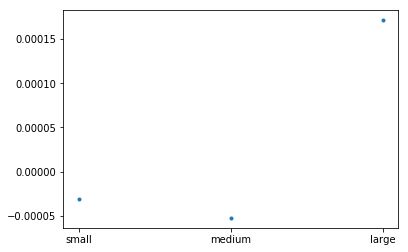

In [22]:
_ = plt.plot(['small', 'medium', 'large'], [slope_sh, slope_mh, slope_lh], marker = ".", linestyle="none")
plt.show()

Discuss statistical and practical significance.  Do they differ here?

The overall slope appears to be negative giving the impression that fewer large hospitals are more efficient than many small hospitals.  In reviewing the data, however, it's actually the small and medium hospitals that are contributing the most to the negative slope.  Large hospitals actually have a slightly positive slope.